<a href="https://colab.research.google.com/github/MMubasharM/git-practice/blob/main/Taste_Algorithm_Order_Profit_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Taste Algorithm – Order-Level Profitability Analysis

This notebook analyzes restaurant order data to understand revenue,
costs, marketing spend, and net profitability.

The goal is to identify which promotions, zones, and payment methods
impact profit and to suggest improvements.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')


Load data

In [ ]:
orders = pd.read_csv('orders.csv')
costs = pd.read_csv('costs.csv')
marketing = pd.read_csv('marketing_costs.csv')


Cleaning

In [ ]:
orders['Date'] = pd.to_datetime(orders['Date'], dayfirst=True)
orders['Payment Method'] = orders['Payment Method'].str.upper().str.strip()
orders['Delivery Zone'] = orders['Delivery Zone'].fillna('Unknown')


Merge

In [ ]:
df = orders.merge(costs, on='Order ID', how='left') \
           .merge(marketing, on='Order ID', how='left')


KPIs

In [ ]:
df['Gross Profit'] = df['Gross Revenue (₹)'] - df['COGS (Food+Pkg) ₹']
df['Net Profit'] = df['Gross Profit'] - df['Total Marketing ₹']
df['Marketing %'] = (df['Total Marketing ₹'] / df['Gross Revenue (₹)']) * 100


Insight:
Certain delivery zones show consistently lower average net profit.
This suggests higher delivery or promotion costs in these zones,
indicating a need for zone-specific pricing or incentive optimization.

Insight:
Some zones require disproportionately high marketing spend as a
percentage of revenue, which negatively impacts profitability.
Reducing freebies or adjusting pricing in these zones can improve margins.



In [ ]:
df.groupby('Delivery Zone')['Net Profit'].mean().sort_values()


,Net Profit
Delivery Zone,
AFS Hall,24.000
Old Market,39.000
New APMC,58.375
Behind New Busstand,75.000


Visualization

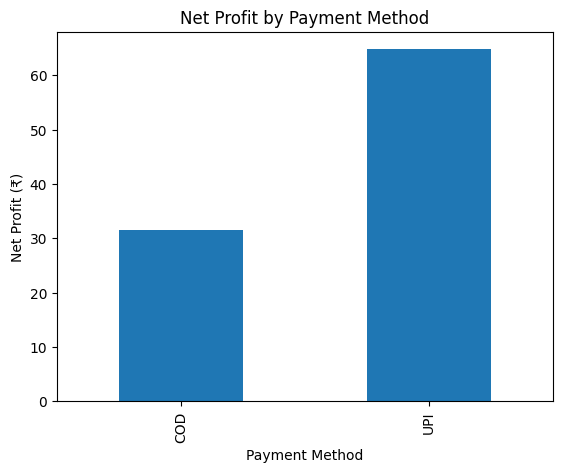

In [ ]:
df.groupby('Payment Method')['Net Profit'].mean().plot(kind='bar')
plt.title('Net Profit by Payment Method')
plt.ylabel('Net Profit (₹)')
plt.show()


Insight:
UPI orders generate significantly higher net profit than COD.
Encouraging prepaid payments can directly improve margins
and reduce operational friction.


Final Recommendations:

1. Promote UPI payments through small incentives to improve net profit.
2. Reduce or optimize free delivery in low-margin zones.
3. Gradually phase out high-cost freebies with low ROI.
4. Focus marketing spend on higher-priced, higher-margin items.
